
## Assignment 7 - Ryan Timbrook
Assignment Objective:
    Do the following to create, execute and compare linear regression models for the price from the automotive data set. Use all features for each of your models. Make sure you remove the symbolizing and normalized losses columns first.

    1.) Stepwise Regression. 
    2.) SVD Regression. 
    3.) Elastic Net Regression. 

    To evaluate and compare these models use both summary statistics and plots of the residuals. 
    What to answer with this data:
        How similar or different is the performance? 
        Do you consider any of these models to be a good fit to the data?

Observations:
    The results are similar for each of the models. For this data set these methods appear to be a good fit. This is shown below in the Stepwise Regression summary data table, the SVD Regression summary data table and the Elastic Net Regression summary data table.
    
    The stepwise regression model produced a high Adjusted R-squared value of 0.9829 along with a significantly low p-value of < 2.2e-16; Step: AIC=-1015.98
    The Elastic Net Regression summary data:
        SSE = 49.6263868117087 
        SSR = 0.629650293920823 
        SST = 50.2560371056296 
        RMSE = 0.257131537884501 
        Adjusted R^2 = 0.987207385886177
    
    

In [57]:
# Clear memory and console 
rm(list=ls())
cat('\014')

# Require Libraries
if(!require(HistData)){install.packages("HistData")}
if(!require(dplyr)){install.packages("dplyr")}
if(!require(ggplot2)){install.packages("ggplot2")}
if(!require(gridExtra)){install.packages("gridExtra")}
if(!require(MASS)){install.packages("MASS")}
if(!require(glmnet)){install.packages("glmnet")}

## Read Automobile price data
read.auto = function(file = 'Automobile price data _Raw_.csv'){
  ## Read the csv file
  auto.price <- read.csv(file, header = TRUE, stringsAsFactors = FALSE)
  
  ## Coerce some character columns to numeric
  numcols <- c('price', 'bore', 'stroke', 'horsepower', 'peak.rpm', 'city.mpg', 'highway.mpg', 'curb.weight', 
               'wheel.base', 'width', 'engine.size', 'length', 'height')
  auto.price[, numcols] <- lapply(auto.price[, numcols], as.numeric)
  
  ## Remove cases or rows with missing values. 
  auto.price = auto.price[complete.cases(auto.price), ]
  
  # Add log normal of price as new attribute
  auto.price$lnprice = log(auto.price$price)
  
  ## Scale the numeric columns
  auto.price[, numcols] = data.frame(lapply(auto.price[, numcols], scale))
  auto.price
  
  ## Remove Symbolizing and normalized losses columns
  drop.cols = c('symboling','normalized.losses')
  auto.price = auto.price[,!(names(auto.price) %in% drop.cols)]
}

# Read Auto data file
auto.price = read.auto()

Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"Warning message in lapply(auto.price[, numcols], as.numeric):
"NAs introduced by coercion"

Use the stepAIC function from the MASS package to perform stepwise regression starting with the linear model including all features.
Which features are remain in the model? 
Evaluate this model using the summary and plot methods for your model object.


Call:
lm(formula = lnprice ~ ., data = auto.price)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.184905 -0.034233  0.001342  0.039247  0.122107 

Coefficients: (3 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             9.365798   0.439970  21.287  < 2e-16 ***
makeaudi                0.222788   0.086306   2.581 0.010891 *  
makebmw                 0.202520   0.091394   2.216 0.028348 *  
makechevrolet           0.164119   0.089868   1.826 0.069995 .  
makedodge               0.050679   0.075070   0.675 0.500753    
makehonda               0.247364   0.085690   2.887 0.004525 ** 
makeisuzu              -0.186024   0.096233  -1.933 0.055291 .  
makejaguar             -0.289516   0.108054  -2.679 0.008280 ** 
makemazda               0.132140   0.066521   1.986 0.048979 *  
makemercedes-benz      -0.045017   0.097063  -0.464 0.643537    
makemercury             0.220739   0.114674   1.925 0.056311 . 

Warning message:
"not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119"

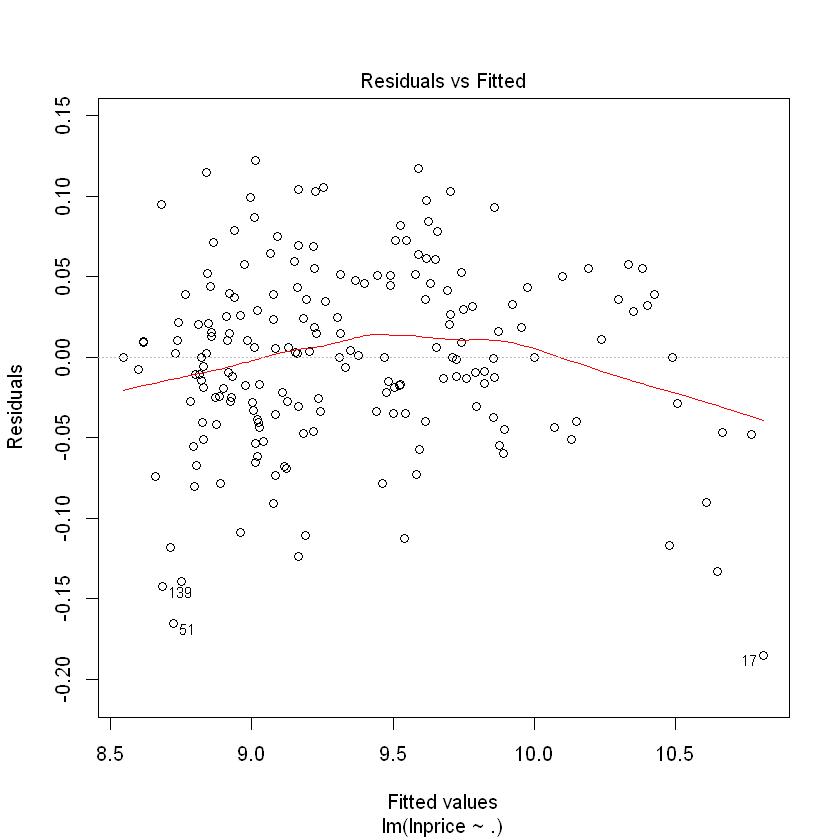

Warning message:
"not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119"

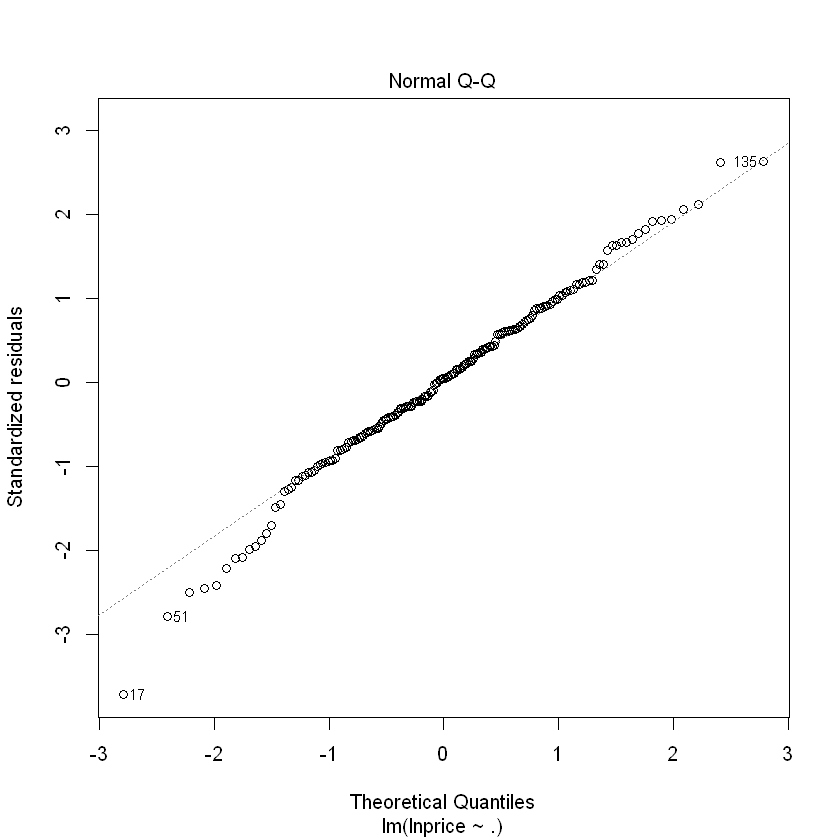

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

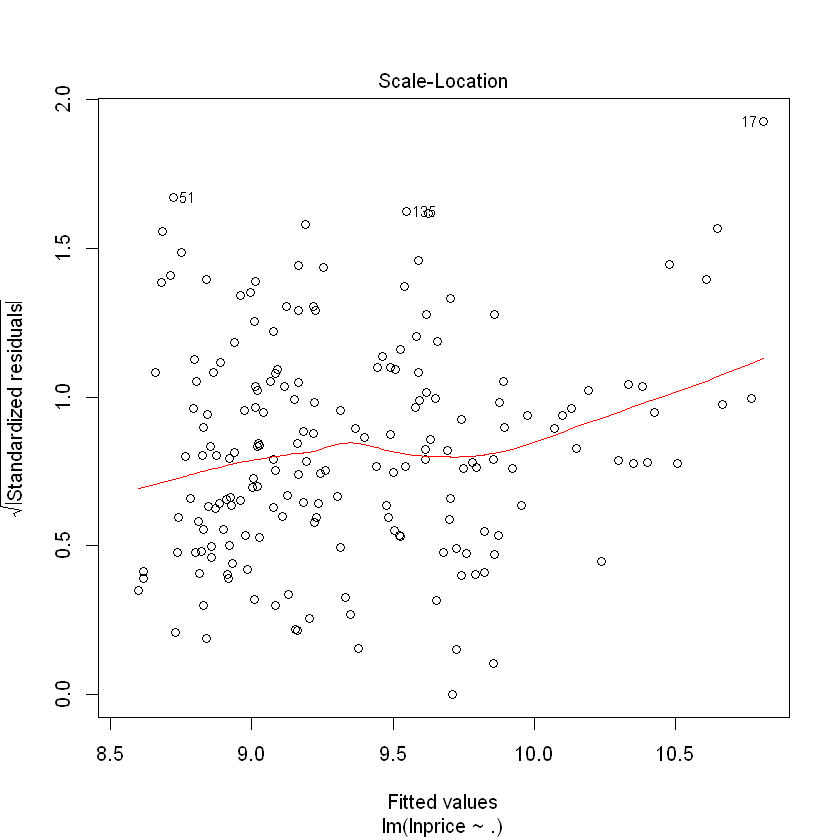

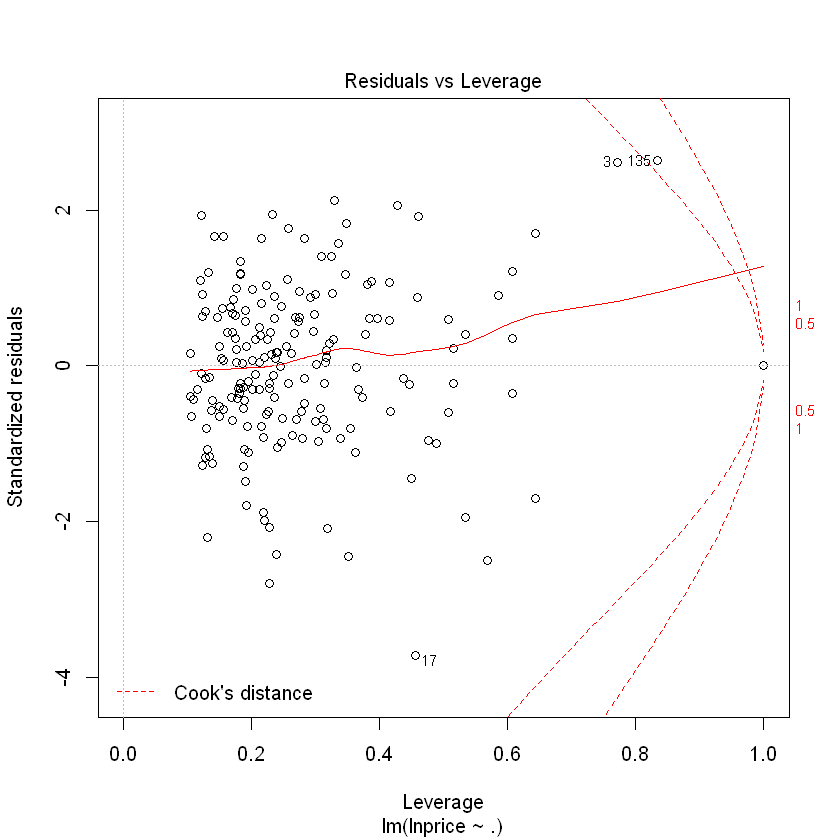

In [58]:
# Computing the model price with all features
lm.lnprice = lm(lnprice ~ ., data = auto.price)
summary(lm.lnprice)
plot(lm.lnprice)

Start:  AIC=-1004.07
lnprice ~ make + fuel.type + aspiration + num.of.doors + body.style + 
    drive.wheels + engine.location + wheel.base + length + width + 
    height + curb.weight + engine.type + num.of.cylinders + engine.size + 
    fuel.system + bore + stroke + compression.ratio + horsepower + 
    peak.rpm + city.mpg + highway.mpg + price


Step:  AIC=-1004.07
lnprice ~ make + fuel.type + aspiration + num.of.doors + body.style + 
    drive.wheels + wheel.base + length + width + height + curb.weight + 
    engine.type + num.of.cylinders + engine.size + fuel.system + 
    bore + stroke + compression.ratio + horsepower + peak.rpm + 
    city.mpg + highway.mpg + price


Step:  AIC=-1004.07
lnprice ~ make + aspiration + num.of.doors + body.style + drive.wheels + 
    wheel.base + length + width + height + curb.weight + engine.type + 
    num.of.cylinders + engine.size + fuel.system + bore + stroke + 
    compression.ratio + horsepower + peak.rpm + city.mpg + highway.mpg + 
    price

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
,NA,NA,137,0.6243957,-1004.074
- engine.location,0,3.330669e-16,137,0.6243957,-1004.074
- fuel.type,0,3.441691e-15,137,0.6243957,-1004.074
- body.style,4,1.323927e-02,141,0.6376350,-1007.983
- compression.ratio,1,2.614157e-04,142,0.6378964,-1009.903
- aspiration,1,1.027701e-03,143,0.6389241,-1011.589
- length,1,1.602227e-03,144,0.6405263,-1013.101
- bore,1,2.935338e-03,145,0.6434616,-1014.209
- width,1,3.386383e-03,146,0.6468480,-1015.185
- wheel.base,1,3.996937e-03,147,0.6508450,-1015.984



Call:
lm(formula = lnprice ~ make + num.of.doors + drive.wheels + height + 
    curb.weight + engine.type + num.of.cylinders + engine.size + 
    fuel.system + stroke + horsepower + peak.rpm + city.mpg + 
    highway.mpg + price, data = auto.price)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.19948 -0.03387  0.00000  0.03921  0.14010 

Coefficients: (1 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)             9.146425   0.134581  67.962  < 2e-16 ***
makeaudi                0.180216   0.075605   2.384 0.018419 *  
makebmw                 0.150903   0.070317   2.146 0.033511 *  
makechevrolet           0.140104   0.077422   1.810 0.072396 .  
makedodge               0.025751   0.061782   0.417 0.677436    
makehonda               0.209295   0.077078   2.715 0.007414 ** 
makeisuzu              -0.194317   0.086818  -2.238 0.026710 *  
makejaguar             -0.289176   0.086083  -3.359 0.000996 ***
makem

Warning message:
"not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119"

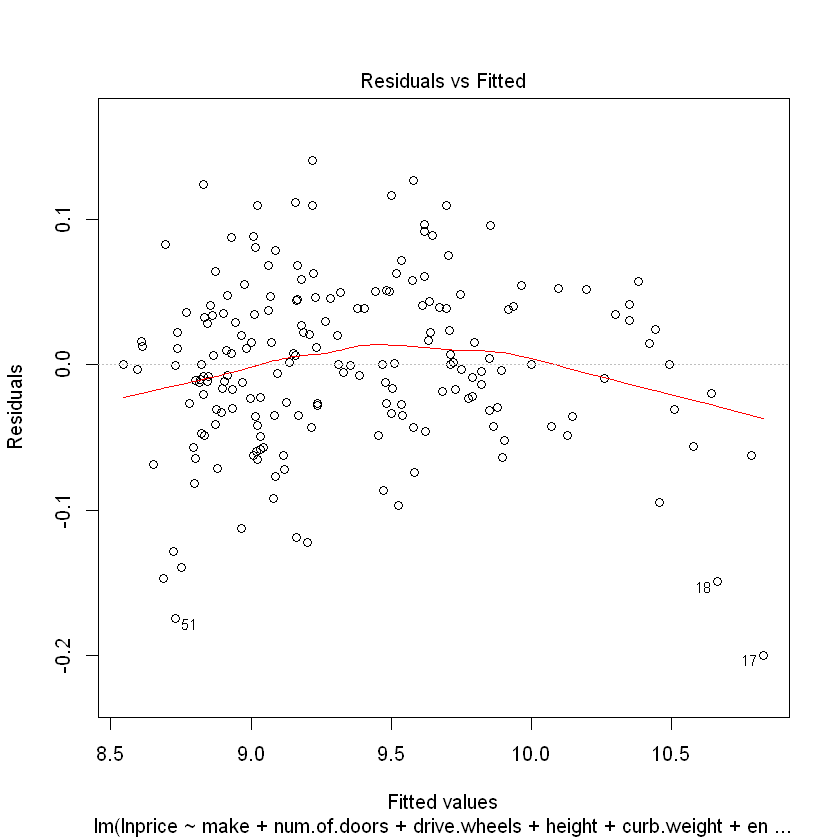

Warning message:
"not plotting observations with leverage one:
  18, 29, 43, 44, 47, 119"

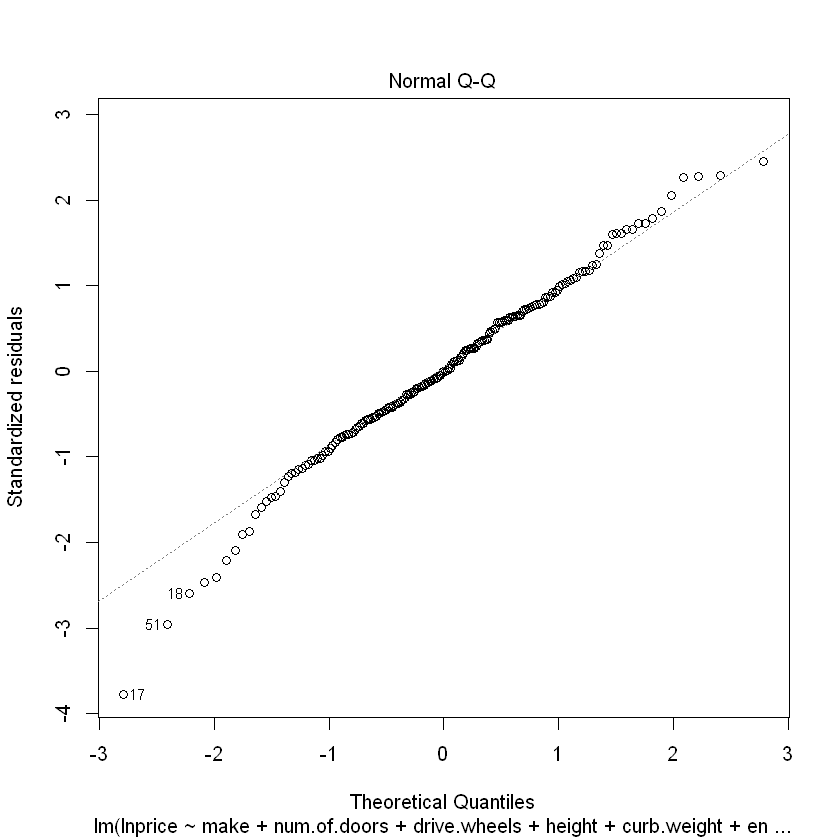

Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"Warning message in sqrt(crit * p * (1 - hh)/hh):
"NaNs produced"

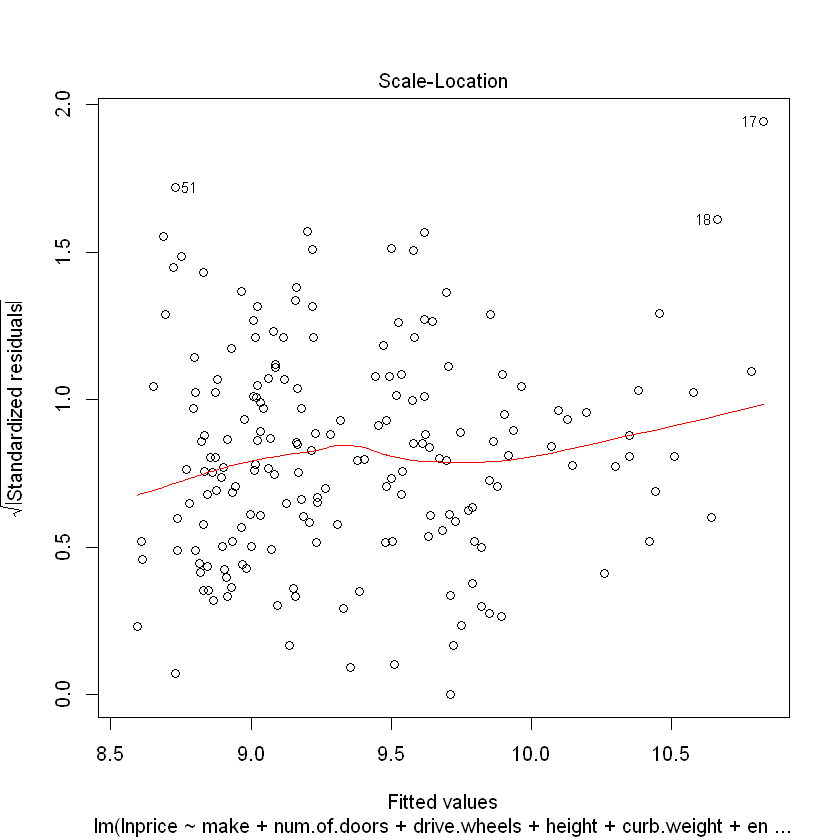

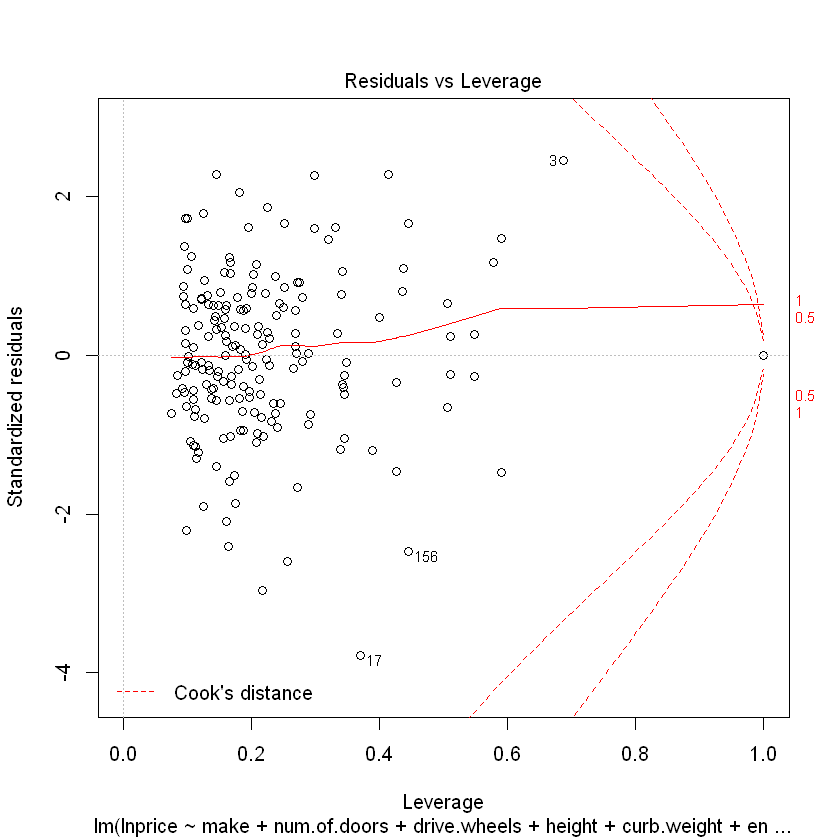

In [59]:
# stepAIC function from the MASS package to perform stepwise regression starting with the linear model including all features.
lm.step.lnprice = stepAIC(lm.lnprice, direction = 'both')
lm.step.lnprice$anova # Run an ANOVA on the results
summary(lm.step.lnprice) # Summary of the best model
plot(lm.step.lnprice)

Remaining Features after running the AIC function are:
    Step:  AIC=-1015.98
    
    lnprice ~ make + num.of.doors + drive.wheels + height + curb.weight + 
    engine.type + num.of.cylinders + engine.size + fuel.system + 
    stroke + horsepower + peak.rpm + city.mpg + highway.mpg + 
    price

Create a model matrix for all features using the model.matrix function with no intercept term (e.g. -1 in your model formula). 

Examine the first few rows of the model matrix. 
    Notice how the categorical variables are encoded by a series of dummy variables. 
    Does the coding make sense given the number of unique levels? 

Next, compute the SVD of the model matrix. 
    Examine the singular values and determine which diagonal elements of the inverse singular value matrix should be set to zero. A plot may help you understand the fall-off in singular values. 
    
Then compute the weight vector. Use the weight vector to compute scores and evaluate the model. You may need to try models with several different numbers of inverse singular values set to zero to find a model with good overall performance.

In [60]:
# Create the model matrix for all features
mm.lnprice = model.matrix(lnprice ~ . - 1,data = auto.price)
# Check the dimensions
dim(mm.lnprice) 
# Quick sanity check
mm.lnprice[0:20,]
#head(mm.lnprice) 


[1] 195  61

,makealfa-romero,makeaudi,makebmw,makechevrolet,makedodge,makehonda,makeisuzu,makejaguar,makemazda,makemercedes-benz,...,fuel.systemspdi,fuel.systemspfi,bore,stroke,compression.ratio,horsepower,peak.rpm,city.mpg,highway.mpg,price
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0.51722370,-1.8156042,9.0,0.20407341,-0.212456246,-0.6833460,-0.5624320,0.03065721
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0.51722370,-1.8156042,9.0,0.20407341,-0.212456246,-0.6833460,-0.5624320,0.40365583
3,1,0,0,0,0,0,0,0,0,0,...,0,0,-2.38862281,0.6994019,9.0,1.33954493,-0.212456246,-0.9957786,-0.7088596,0.40365583
4,0,1,0,0,0,0,0,0,0,0,...,0,0,-0.51269658,0.4765533,10.0,-0.03358342,0.855300659,-0.2146972,-0.1231493,0.08713454
5,0,1,0,0,0,0,0,0,0,0,...,0,0,-0.51269658,0.4765533,8.0,0.30969867,0.855300659,-1.1519949,-1.2945699,0.52157553
6,0,1,0,0,0,0,0,0,0,0,...,0,0,-0.51269658,0.4765533,8.5,0.17766710,0.855300659,-0.9957786,-0.8552872,0.24849834
7,0,1,0,0,0,0,0,0,0,0,...,0,0,-0.51269658,0.4765533,8.5,0.17766710,0.855300659,-0.9957786,-0.8552872,0.55384829
8,0,1,0,0,0,0,0,0,0,0,...,0,0,-0.51269658,0.4765533,8.5,0.17766710,0.855300659,-0.9957786,-0.8552872,0.70404074
9,0,1,0,0,0,0,0,0,0,0,...,0,0,-0.73339378,0.4765533,8.3,0.96985653,0.855300659,-1.3082111,-1.5874250,1.31908505
11,0,0,1,0,0,0,0,0,0,0,...,0,0,0.62757230,-1.4335780,8.8,-0.05998973,1.495954801,-0.3709135,-0.2695769,0.39496701


Categorical Variables are encoded with binary true (1) false (0) for the type of attribute (column) it represents per observation (row). The coding matches correctly to the observation. i.e. observation 1 is an automobile with a make of 'alfa-romero'.

[1] 1.552255e+02 3.975512e+01 2.098108e+01 1.638500e+01 1.469062e+01
 [6] 1.174289e+01 9.883347e+00 9.402050e+00 8.594311e+00 8.029647e+00
[11] 7.577213e+00 6.638101e+00 6.309212e+00 5.710002e+00 5.509951e+00
[16] 5.115683e+00 4.702697e+00 4.540261e+00 4.349035e+00 4.230802e+00
[21] 4.108751e+00 3.696058e+00 3.548431e+00 3.393765e+00 3.273311e+00
[26] 3.013782e+00 2.940749e+00 2.815574e+00 2.689123e+00 2.491387e+00
[31] 2.412310e+00 2.318059e+00 2.171388e+00 2.101252e+00 2.006007e+00
[36] 1.733400e+00 1.693144e+00 1.656967e+00 1.532782e+00 1.521816e+00
[41] 1.330923e+00 1.219466e+00 1.103354e+00 1.096985e+00 1.048529e+00
[46] 9.916909e-01 9.254594e-01 8.404457e-01 8.276577e-01 7.553874e-01
[51] 7.290585e-01 6.344813e-01 6.190685e-01 5.705665e-01 4.656315e-01
[56] 4.076680e-01 2.515778e-01 1.427427e-01 2.413772e-14 1.443950e-14
[61] 1.443950e-14

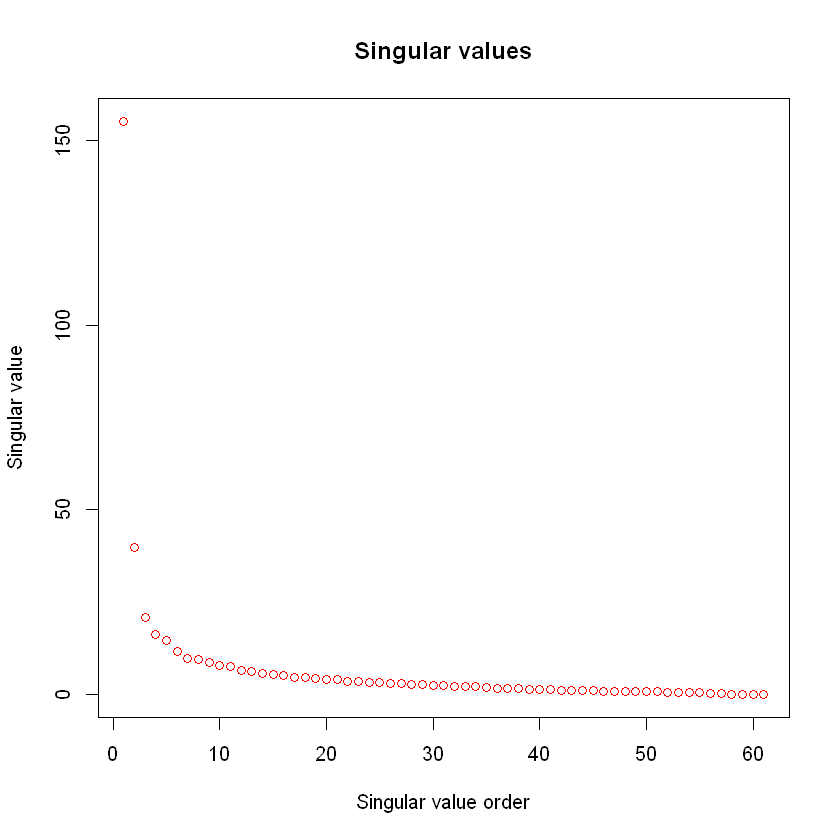

In [61]:
#compute the SVD of the model matrix
m.svd = svd(mm.lnprice)
#a look at the singular values
#m.svd
m.svd$d
# plot the singular values - identify fall-off
plot.sv = function(u){
  ln = length(u)
  plot(1:ln, u, col = 'red',
       main = ('Singular values'),
       xlab = 'Singular value order',
       ylab = 'Singular value')
}
plot.sv(m.svd$d)

 [1] 0.006442243 0.025153995 0.047661983 0.061031434 0.068070665 0.085157905
 [7] 0.101180295 0.106359788 0.116356045 0.124538470 0.131974648 0.150645482
[13] 0.158498387 0.175131290 0.181489816 0.195477333 0.212643936 0.220251669
[19] 0.229936064 0.236361813 0.243382978 0.270558523 0.281814686 0.294657975
[25] 0.305501050 0.331809030 0.340049425 0.355167388 0.371868421 0.401382882
[31] 0.414540344 0.431395328 0.460535013 0.475906657 0.498502677 0.576900724
[37] 0.590617087 0.603512211 0.652408379 0.657109831 0.751358167 0.820031046
[43] 0.906327834 0.911589239 0.953717510 0.000000000 0.000000000 0.000000000
[49] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[55] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[61] 0.000000000
              [,1]
 [1,]  0.366433307
 [2,]  0.345731773
 [3,] -0.113493448
 [4,]  0.173088025
 [5,]  0.289600458
 [6,]  0.439311258
 [7,]  0.021604858
 [8,] -0.215742874
 [9,]  0.360543215
[10,]  0.278256043
[11,

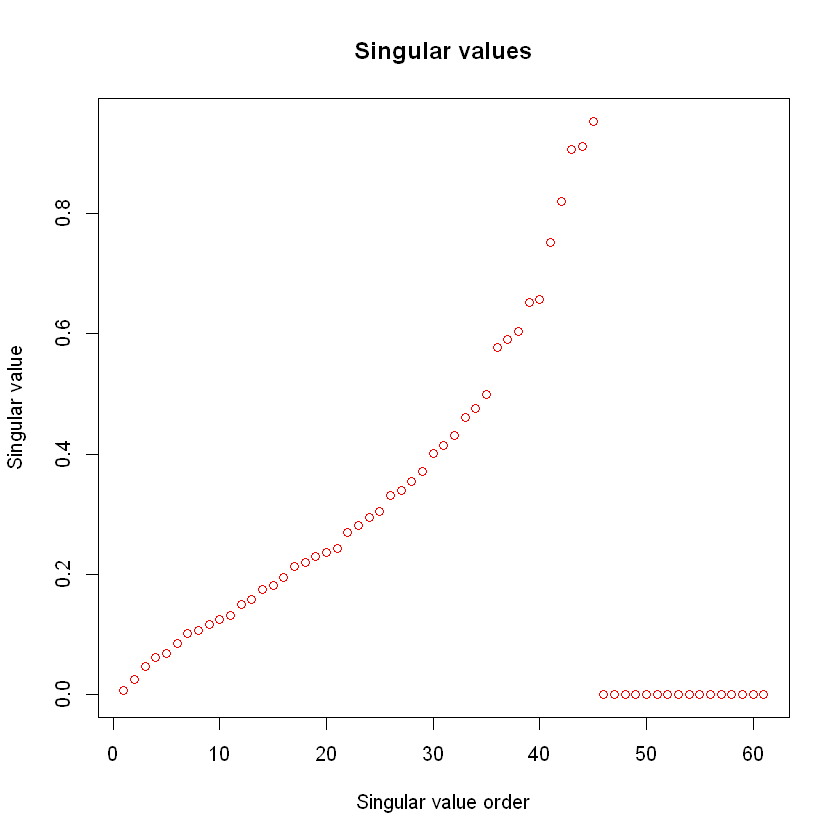

[1] 6.787667
 [1] 0.006442243 0.025153995 0.047661983 0.061031434 0.068070665 0.085157905
 [7] 0.101180295 0.106359788 0.116356045 0.124538470 0.131974648 0.150645482
[13] 0.158498387 0.175131290 0.181489816 0.195477333 0.000000000 0.000000000
[19] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[25] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[31] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[37] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[43] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[49] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[55] 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000 0.000000000
[61] 0.000000000


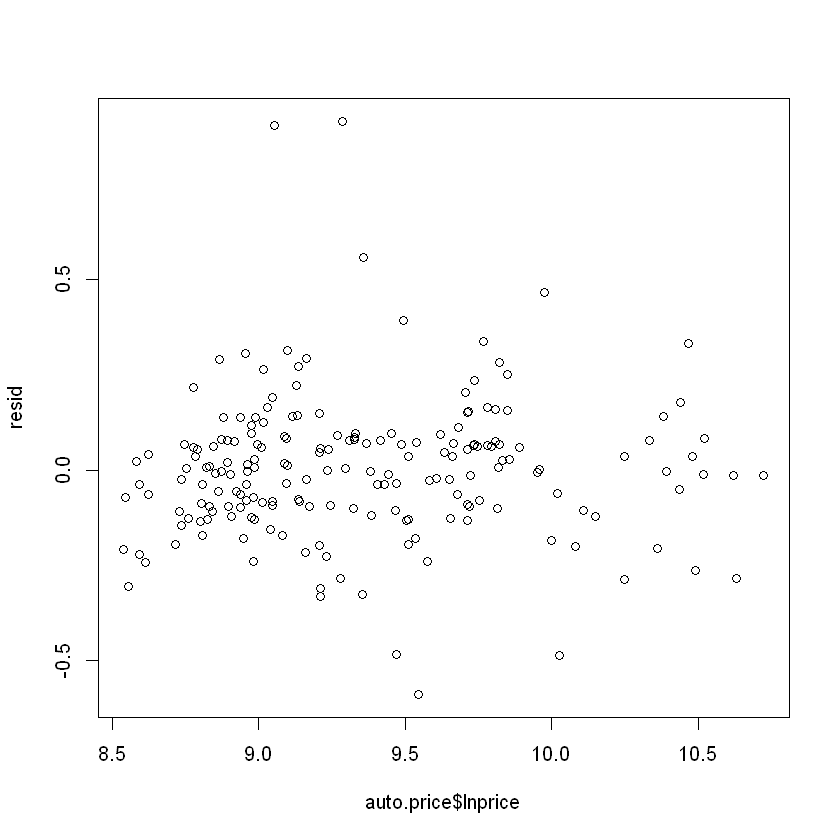

              [,1]
 [1,] -0.042180045
 [2,] -0.034235166
 [3,]  0.174500451
 [4,]  0.096727945
 [5,]  0.177692724
 [6,]  0.290342942
 [7,] -0.002068487
 [8,]  0.105666177
 [9,]  0.089275277
[10,]  0.052362958
[11,]  0.016577790
[12,]  0.044788626
[13,] -0.087004822
[14,]  0.135063686
[15,]  0.084027259
[16,] -0.028988697
[17,] -0.087349659
[18,]  0.176886936
[19,]  0.166667897
[20,] -0.137130645
[21,] -0.008020628
[22,]  1.896988459
[23,] -0.205778819
[24,]  0.794749863
[25,]  0.435922561
[26,] -0.041099881
[27,]  0.824388100
[28,]  0.350801900
[29,]  0.076109223
[30,]  0.751128809
[31,]  0.352691189
[32,] -0.025546798
[33,]  0.398527729
[34,] -0.541095772
[35,] -0.237576870
[36,]  0.047761721
[37,] -0.214471846
[38,]  0.187726365
[39,]  0.662802778
[40,]  0.151340139
[41,]  0.190976564
[42,] -0.187931312
[43,]  0.909830853
[44,]  0.218007494
[45,]  0.052662679
[46,] -0.005416670
[47,]  0.421974245
[48,]  0.756241501
[49,] -0.713385937
[50,]  0.014599312
[51,]  0.820988179
[52,]  0.039

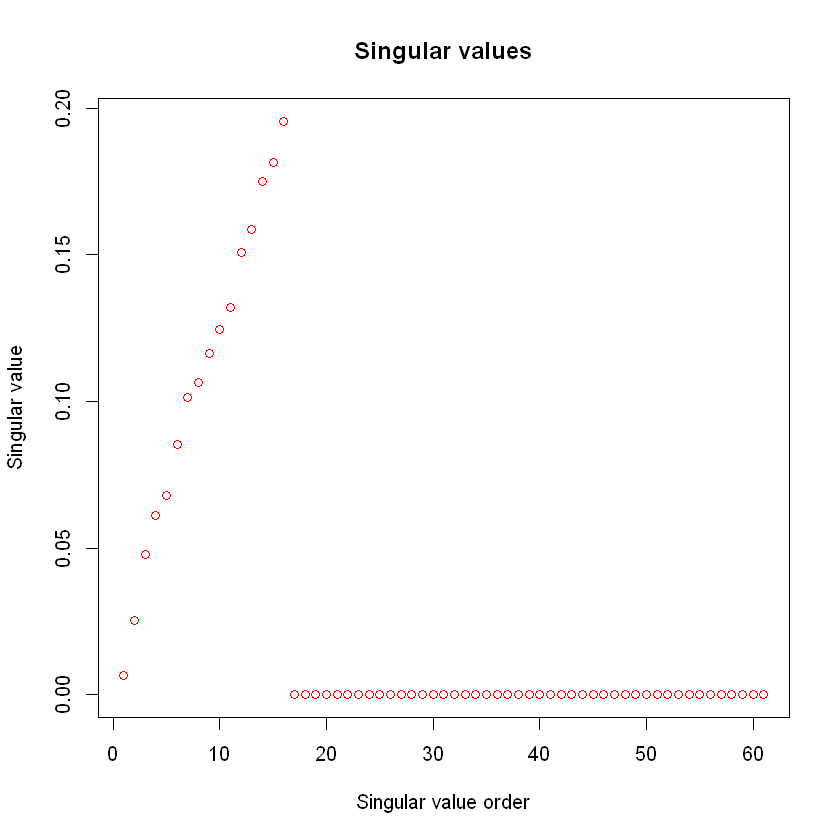

[1] 69.30943
 [1] 0.006442243 0.025153995 0.047661983 0.061031434 0.068070665 0.085157905
 [7] 0.101180295 0.106359788 0.116356045 0.124538470 0.131974648 0.150645482
[13] 0.158498387 0.175131290 0.181489816 0.195477333 0.212643936 0.220251669
[19] 0.229936064 0.236361813 0.243382978 0.270558523 0.281814686 0.294657975
[25] 0.305501050 0.331809030 0.340049425 0.355167388 0.371868421 0.401382882
[31] 0.414540344 0.431395328 0.460535013 0.475906657 0.498502677 0.576900724
[37] 0.590617087 0.603512211 0.652408379 0.657109831 0.751358167 0.820031046
[43] 0.906327834 0.911589239 0.953717510 1.008378740 1.080544383 1.189844871
[49] 1.208228974 1.323824006 1.371632087 1.576090639 1.615330039 1.752644053
[55] 2.147620857 2.452976616 3.974912880 0.000000000 0.000000000 0.000000000
[61] 0.000000000


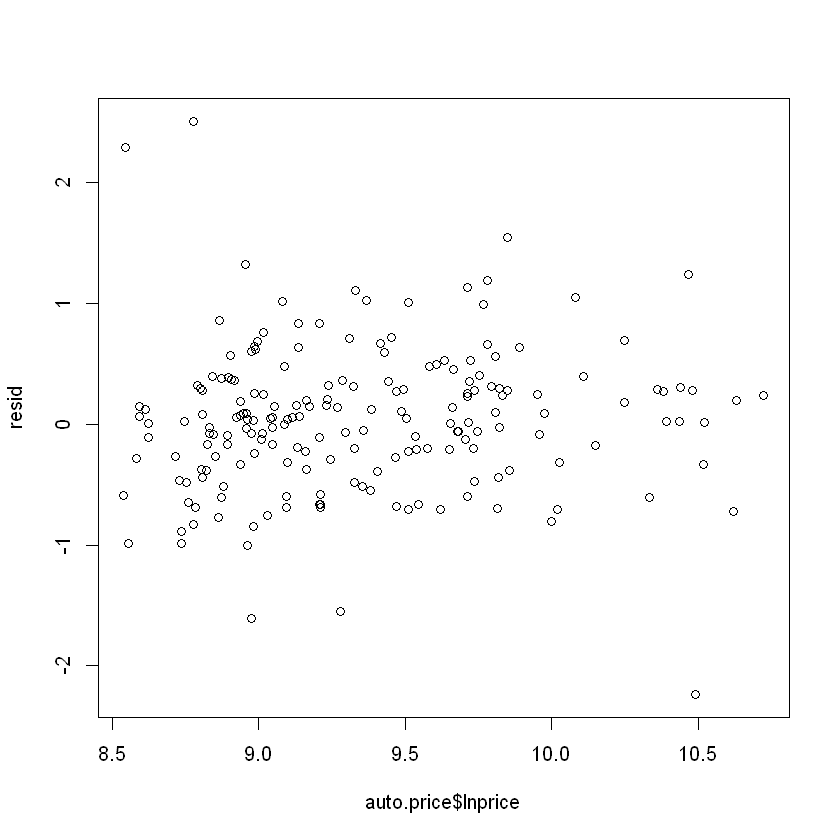

              [,1]
 [1,]  0.009969077
 [2,]  0.082216703
 [3,]  0.400026473
 [4,]  0.218185861
 [5,]  0.241735191
 [6,]  0.249984019
 [7,]  0.196573602
 [8,]  0.059808667
 [9,]  0.385899317
[10,] -0.029052128
[11,]  0.241512125
[12,]  0.230798789
[13,]  0.219204479
[14,]  0.009266984
[15,]  0.192167480
[16,] -0.131696687
[17,] -0.098559873
[18,]  0.190660734
[19,]  0.218143271
[20,]  0.119789060
[21,]  0.216408459
[22,]  4.356824397
[23,]  0.160699225
[24,]  0.100470871
[25,]  0.086574392
[26,] -0.134246552
[27,]  0.055137490
[28,]  0.086045839
[29,]  0.110985881
[30,] -0.042350839
[31,] -0.108514686
[32,] -0.111118939
[33,] -0.037772730
[34,] -0.006353004
[35,] -0.065378852
[36,] -0.009047383
[37,]  0.038140063
[38,]  0.572619162
[39,] -0.027156833
[40,]  0.079541796
[41,]  0.246121844
[42,]  1.100384803
[43,]  0.992253302
[44,]  0.277076696
[45,]  0.563352179
[46,] -2.148715751
[47,]  0.149852030
[48,] -0.028013950
[49,] -1.133782795
[50,]  0.302080462
[51,]  0.094841591
[52,]  0.328

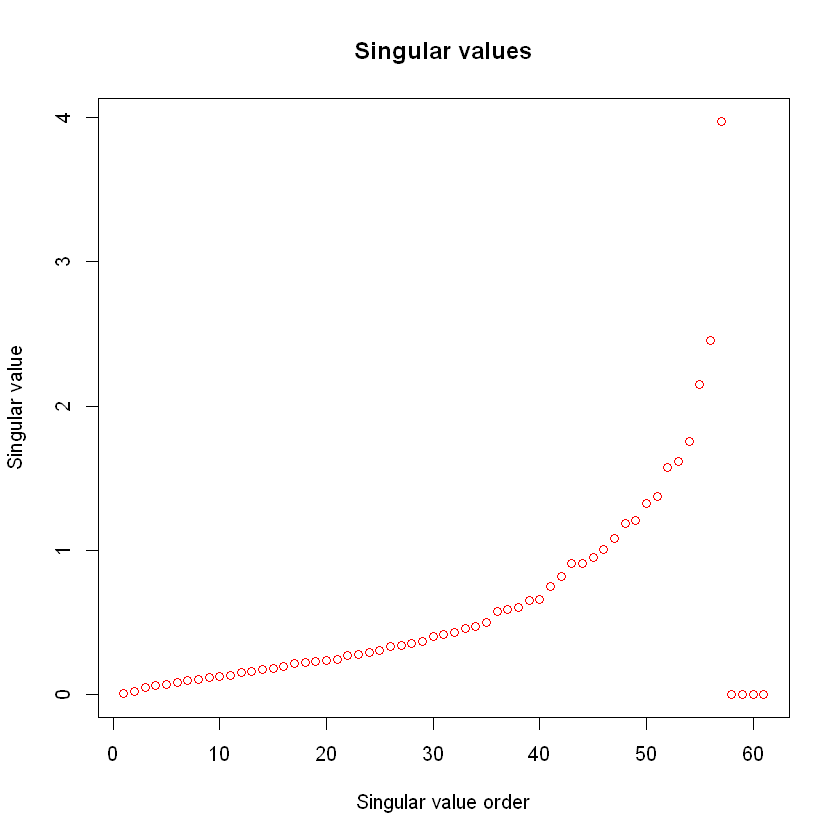

[1] 3.289162


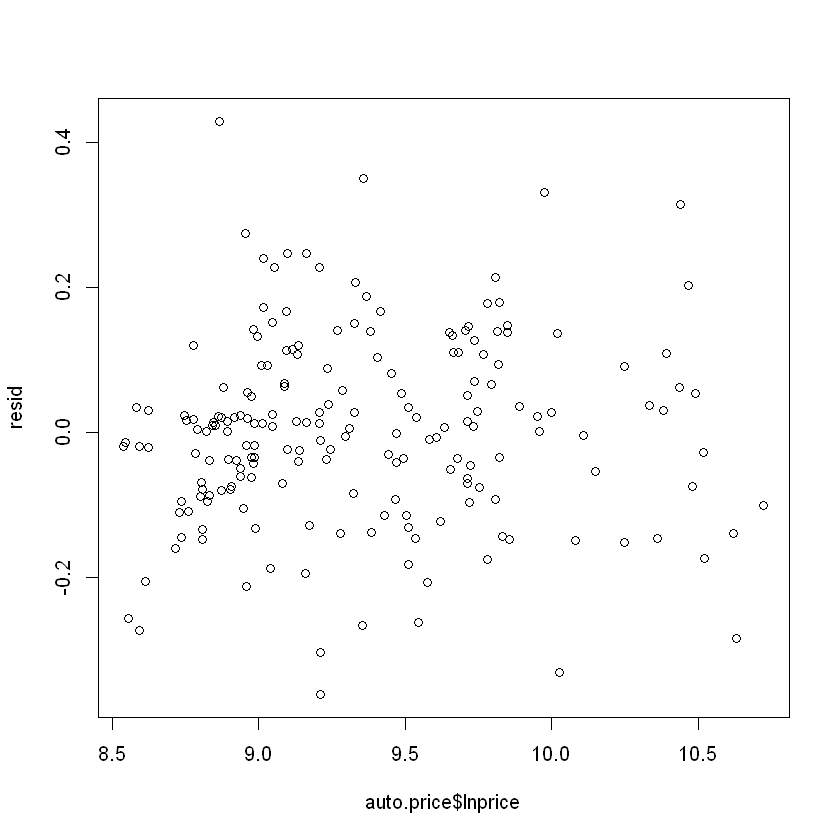

In [62]:
# Set any values less than 1 equal to 0 and create the inverse matrix
test.multiple.thresholds = function(u)
    for(i in u){
        th = i
        m.svd.sub = sapply(m.svd$d, function(x) ifelse(x>th,1/x,0))
        print(m.svd.sub)
        #plot the values
        plot.sv(m.svd.sub)
        #create the inverse
        diag.inv = diag(m.svd.sub)
        ## Compute the pseudeo inverse
        pseudo.inv = m.svd$v %*% diag.inv %*% t(m.svd$u)

        ## Find the model coeficients
        beta =  pseudo.inv %*% auto.price$lnprice
        print(beta)

        ## Compute the predictions
        pred = mm.lnprice %*% beta

        ## Compute and plot the residuals and compute SSE
        resid = auto.price$lnprice - pred
        plot(auto.price$lnprice, resid)
        print(sum(resid*resid))
    }
      
thresholds = c(1,5,0.2)
test.multiple.thresholds(thresholds)



Elastic net regression is the combination of ridge regression and lasso regression. In this case use an alpha parameter of 0.5 to give equal weight to each regularization method. Using the model matrix you created for part 2 and the 1-d matrix of heating loads, compute a Gaussian regression model using 20 values of the regularization parameter lambda. Compute the scores using the predict method. Plot and examine the evaluation of the parameter values and deviance with lambda. Choose a value of lambda (a column in the scores matrix) and evaluate your model. You may need to try several lambda’s to find one which gives good overall performance.

In [63]:
## FUNCTION - Plot svd regression
plot.svd.reg <- function(df, k = 4){
  require(ggplot2)
  require(gridExtra)
  
  p1 <- ggplot(df) + 
    geom_point(aes(score, resids), size = 2) + 
    stat_smooth(aes(score, resids)) +
    ggtitle('Residuals vs. fitted values')
  
  p2 <- ggplot(df, aes(resids)) +
    geom_histogram(aes(y = ..density..)) +
    geom_density(color = 'red', fill = 'red', alpha = 0.2) +
    ggtitle('Histogram of residuals')
  
  qqnorm(df$resids)
  
  grid.arrange(p1, p2, ncol = 2)
  
  df$std.resids = sqrt((df$resids - mean(df$resids))^2)  
  
  p3 = ggplot(df) + 
    geom_point(aes(score, std.resids), size = 2) + 
    stat_smooth(aes(score, std.resids)) +
    ggtitle('Standardized residuals vs. fitted values')
  print(p3) 
  
  n = nrow(df)
  Ybar = mean(df$lnprice)
  SST <- sum((df$lnprice - Ybar)^2)
  SSR <- sum(df$resids * df$resids)
  SSE = SST - SSR
  cat(paste('SSE =', as.character(SSE), '\n'))
  cat(paste('SSR =', as.character(SSR), '\n'))
  cat(paste('SST =', as.character(SSE + SSR), '\n'))
  cat(paste('RMSE =', as.character(SSE/(n - 2)), '\n'))
  
  adjR2  <- 1.0 - (SSR/SST) * ((n - 1)/(n - k - 1))
  cat(paste('Adjusted R^2 =', as.character(adjR2)), '\n')
}

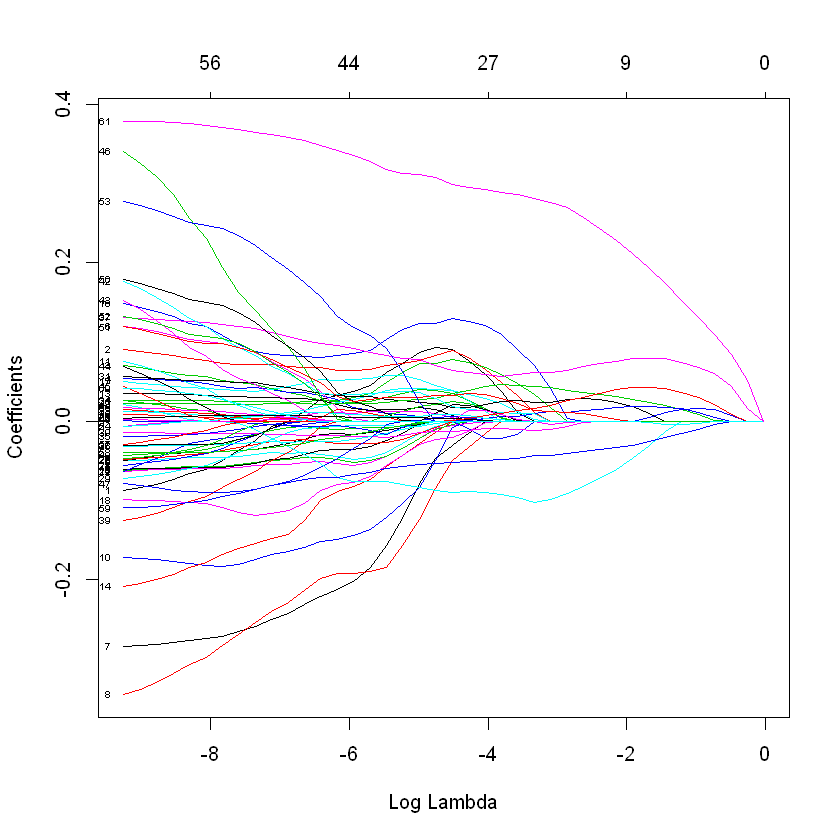

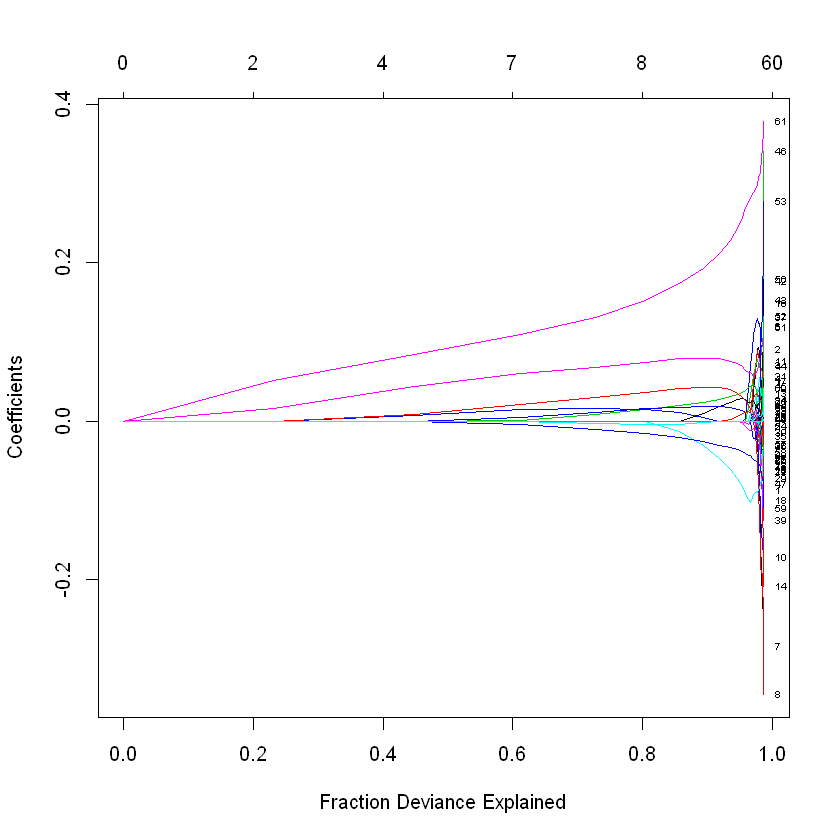

`geom_smooth()` using method = 'loess'
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


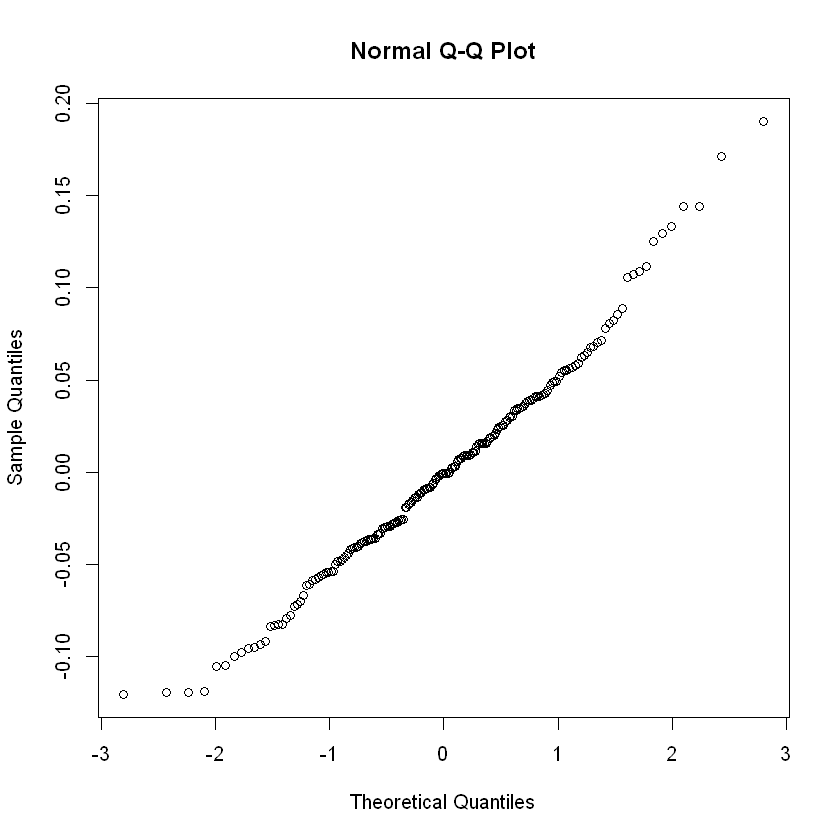

`geom_smooth()` using method = 'loess'


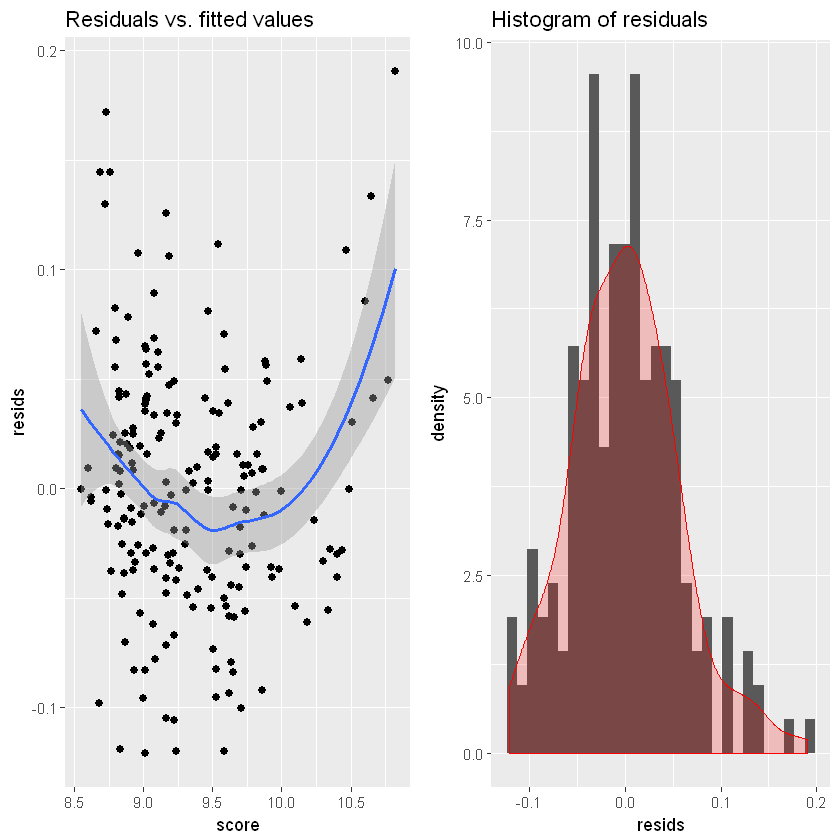

SSE = 49.6263868117087 
SSR = 0.629650293920823 
SST = 50.2560371056296 
RMSE = 0.257131537884501 
Adjusted R^2 = 0.987207385886177 


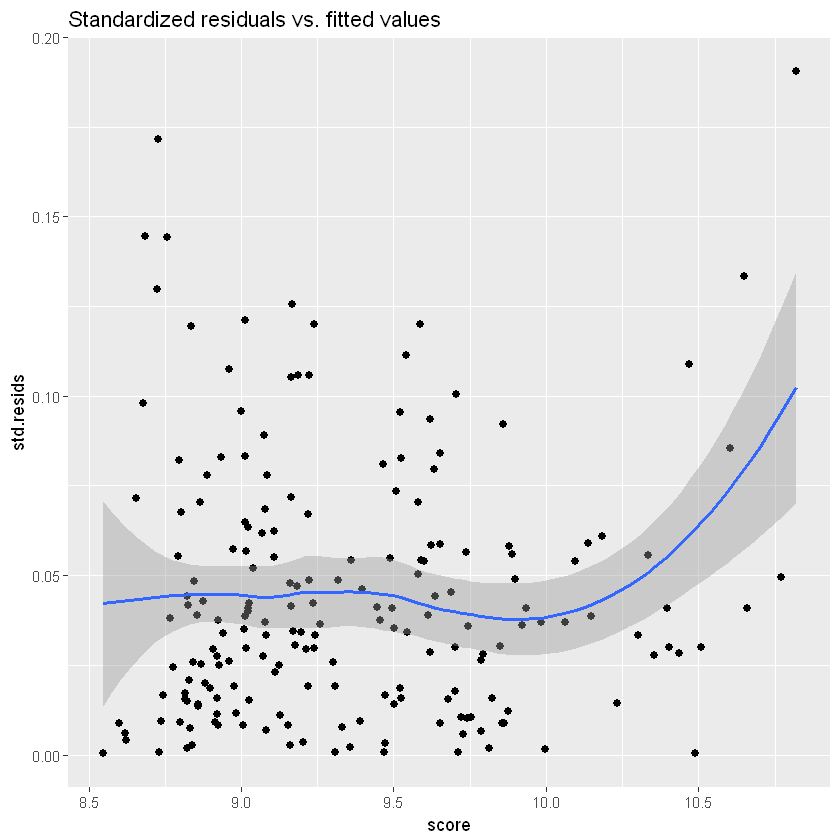

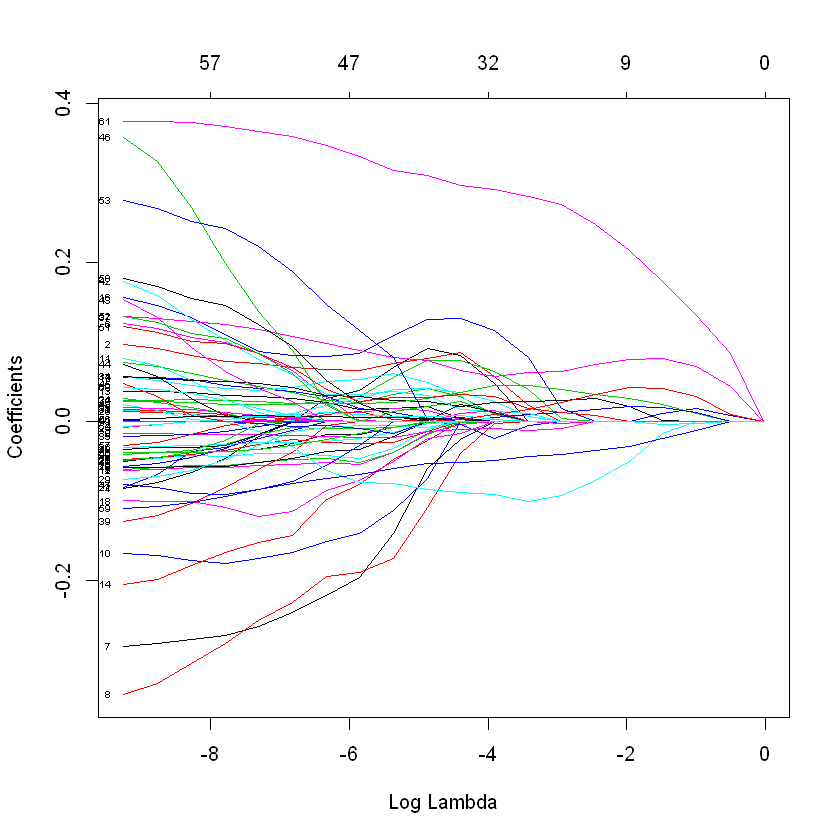

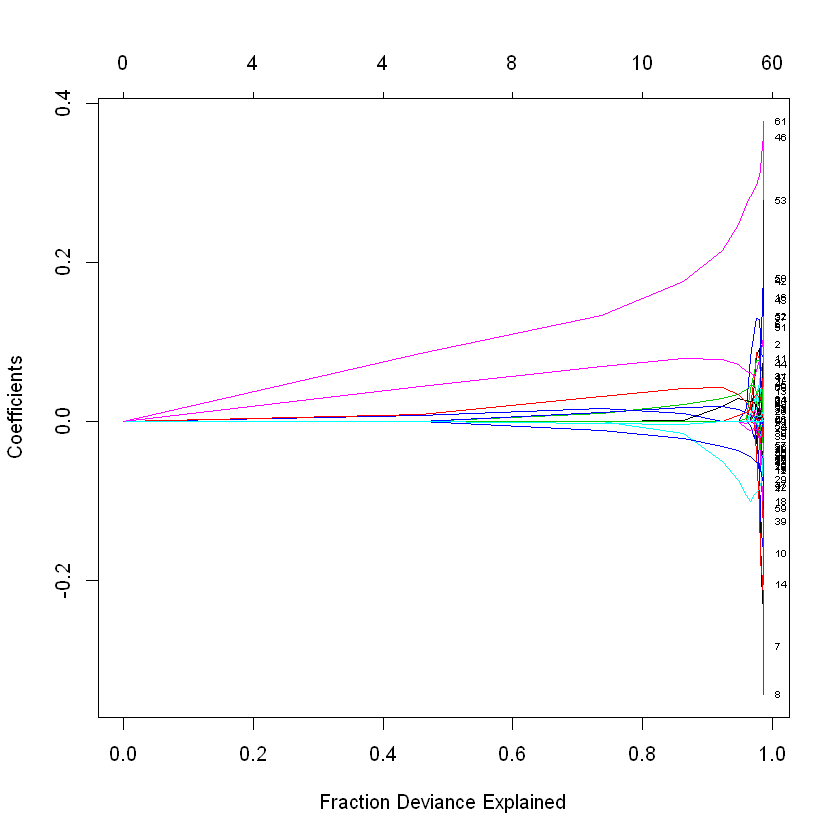

`geom_smooth()` using method = 'loess'
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


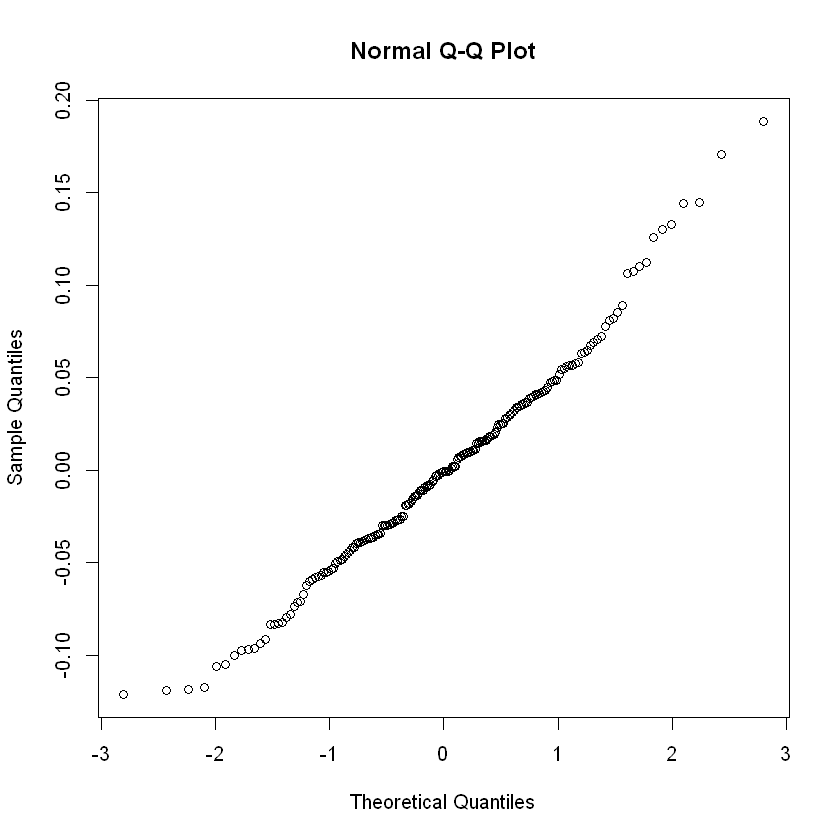

`geom_smooth()` using method = 'loess'


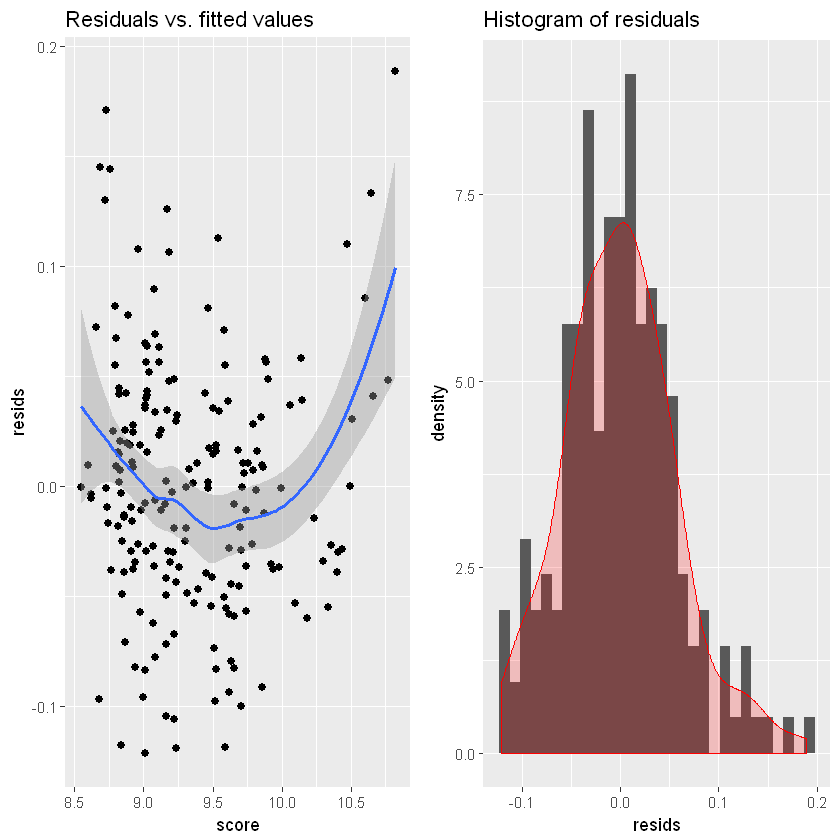

SSE = 49.6268000570002 
SSR = 0.629237048629334 
SST = 50.2560371056296 
RMSE = 0.257133679051815 
Adjusted R^2 = 0.987215781796731 


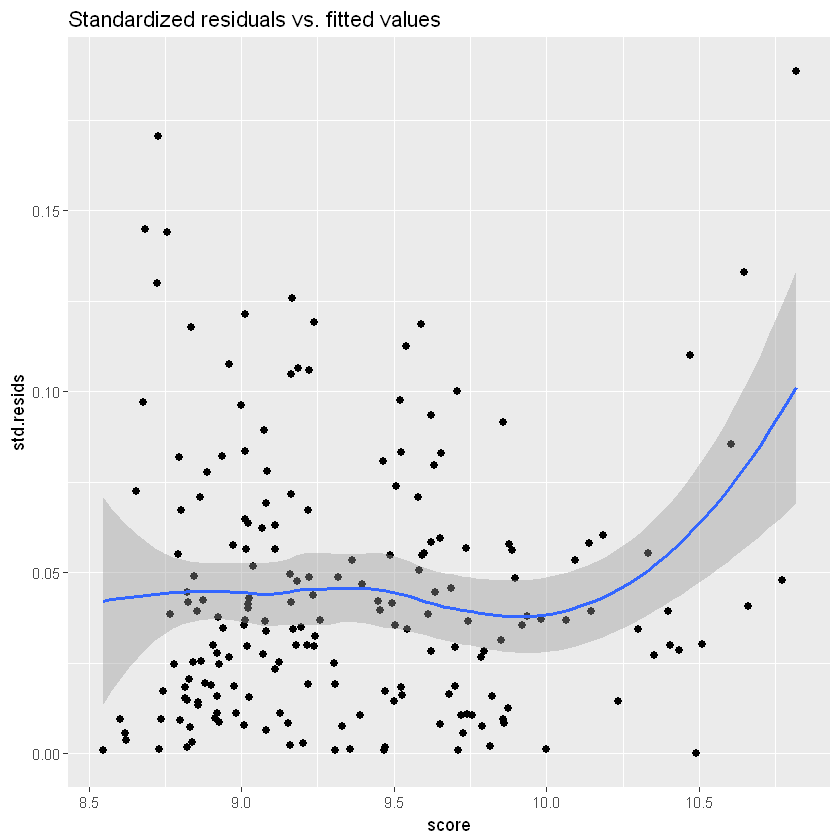

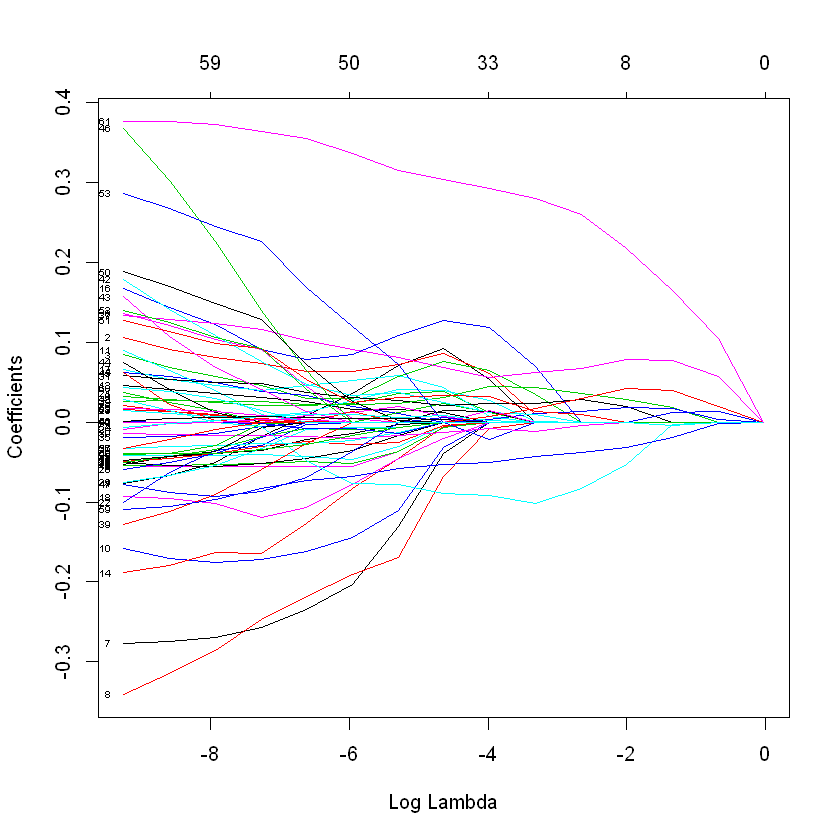

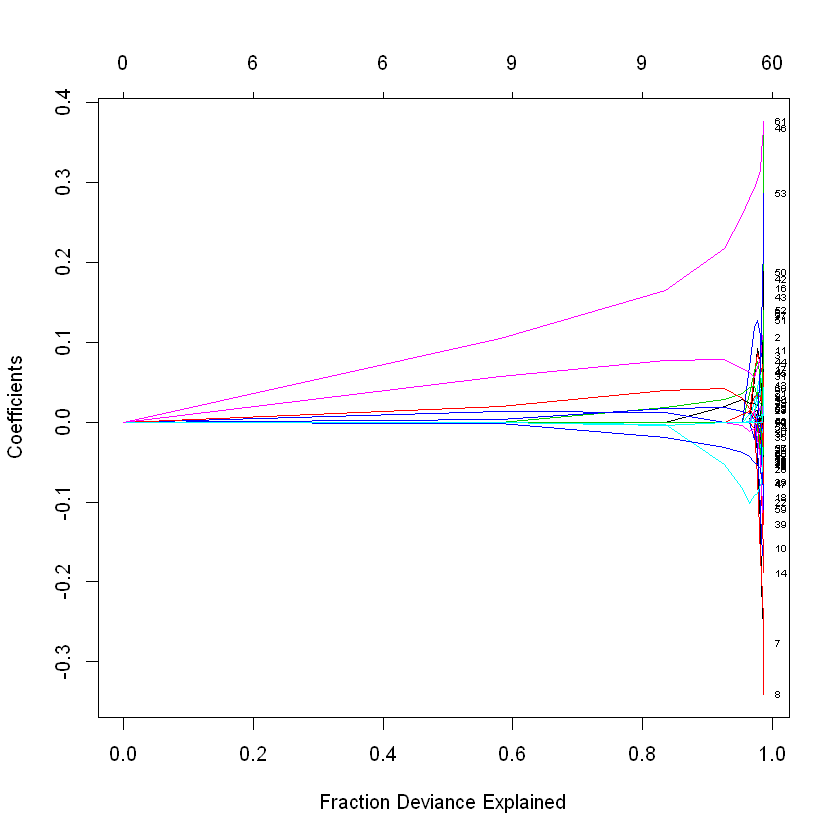

`geom_smooth()` using method = 'loess'
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


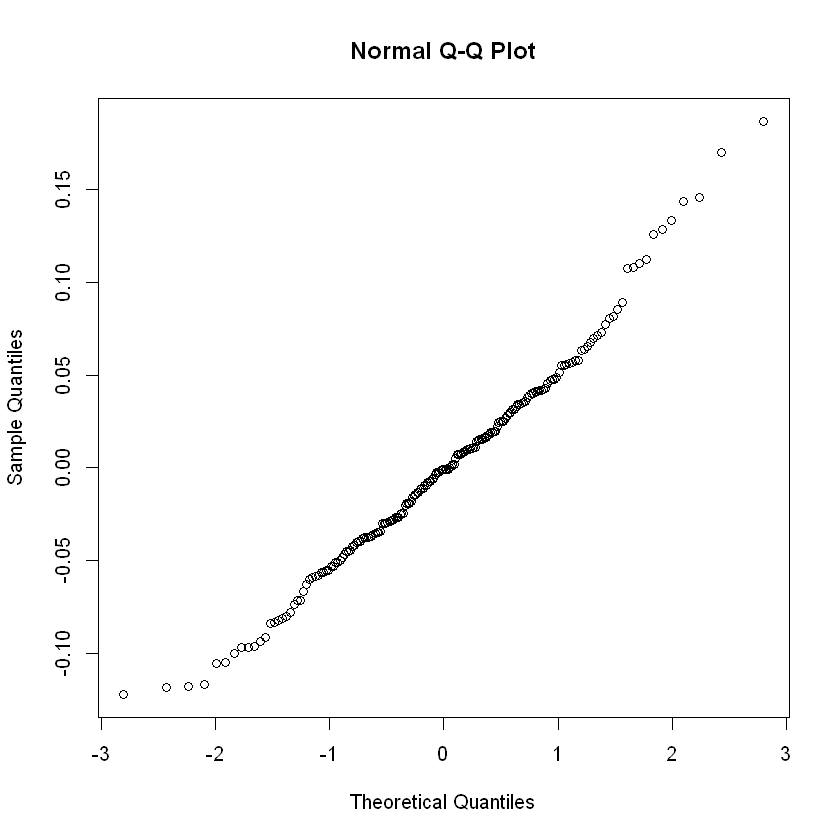

`geom_smooth()` using method = 'loess'


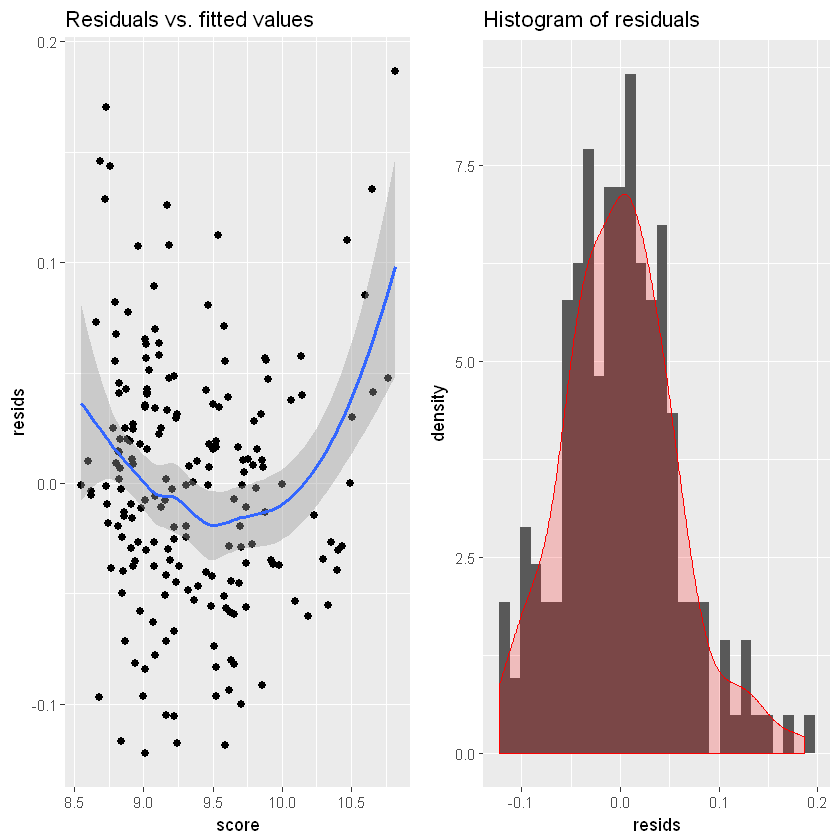

SSE = 49.6276744406377 
SSR = 0.628362664991856 
SST = 50.2560371056296 
RMSE = 0.257138209536983 
Adjusted R^2 = 0.98723354666172 


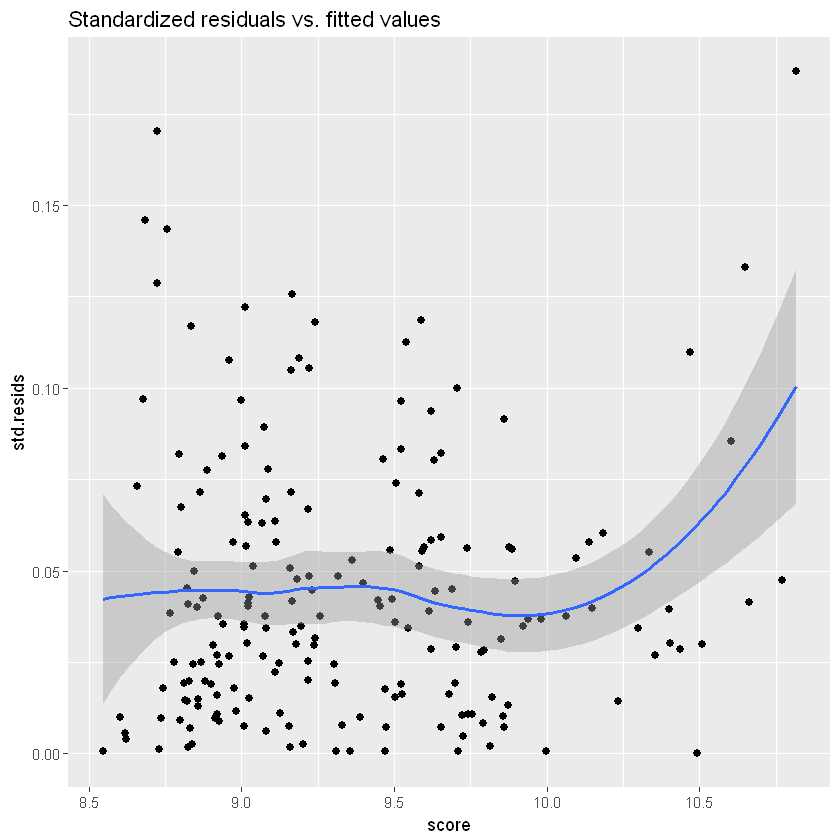

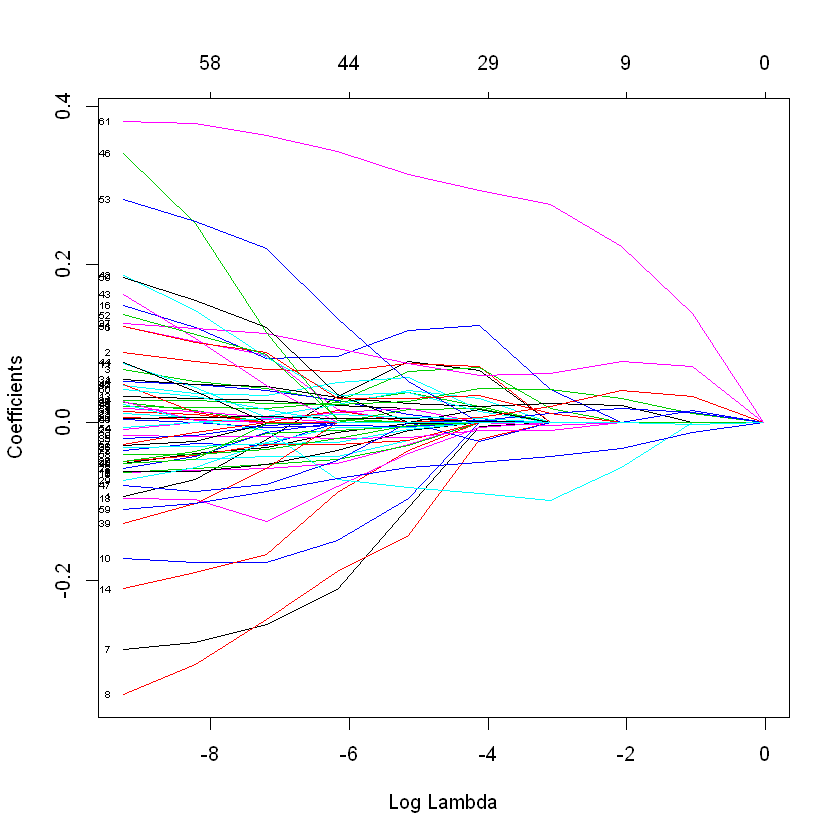

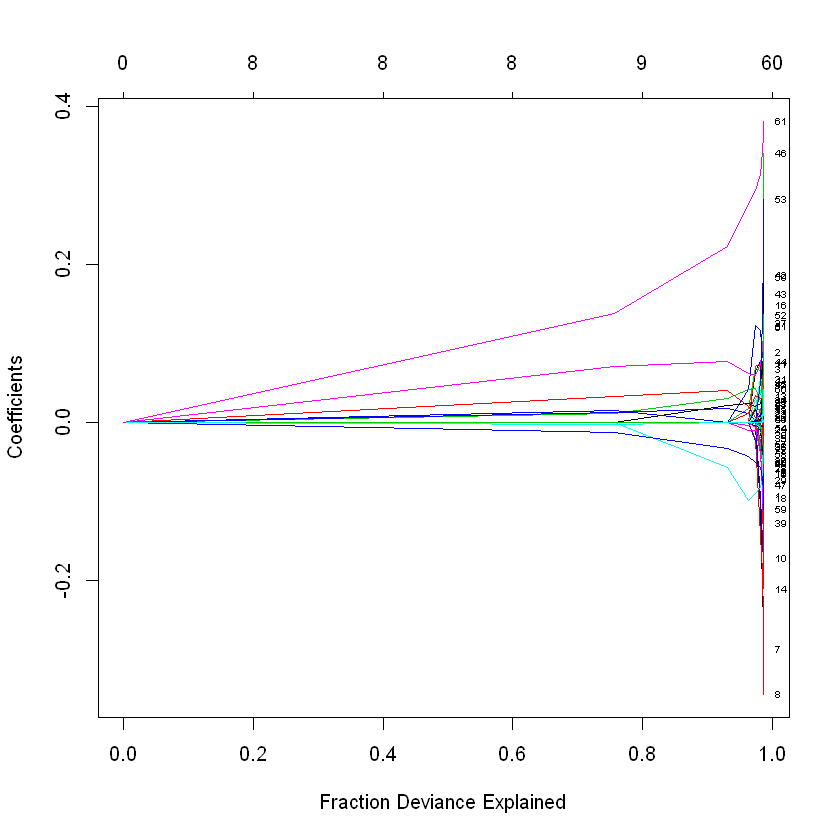

`geom_smooth()` using method = 'loess'
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


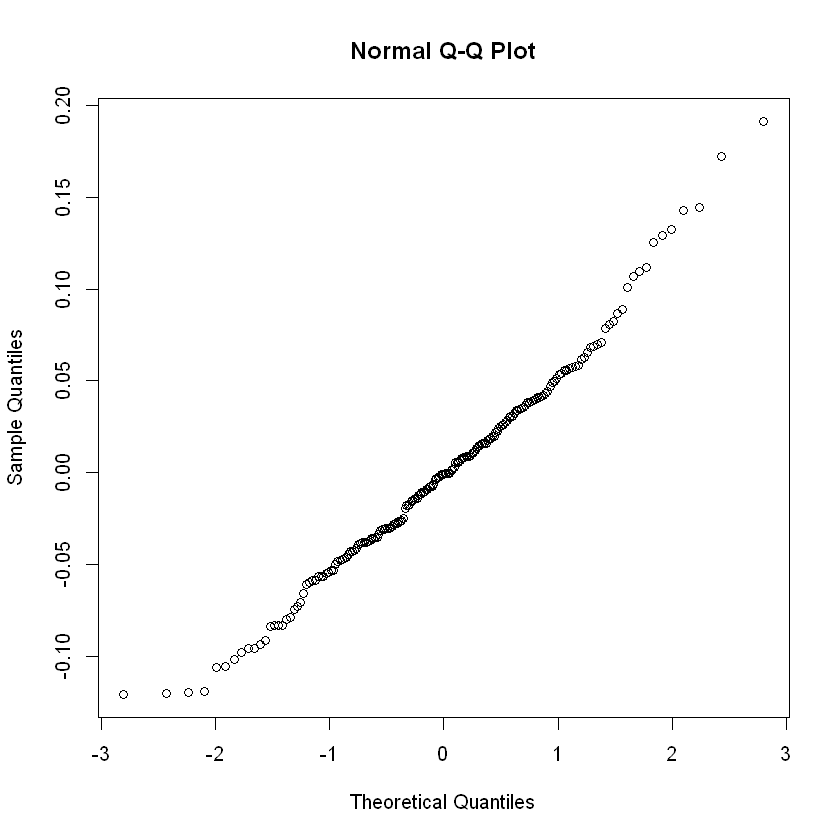

`geom_smooth()` using method = 'loess'


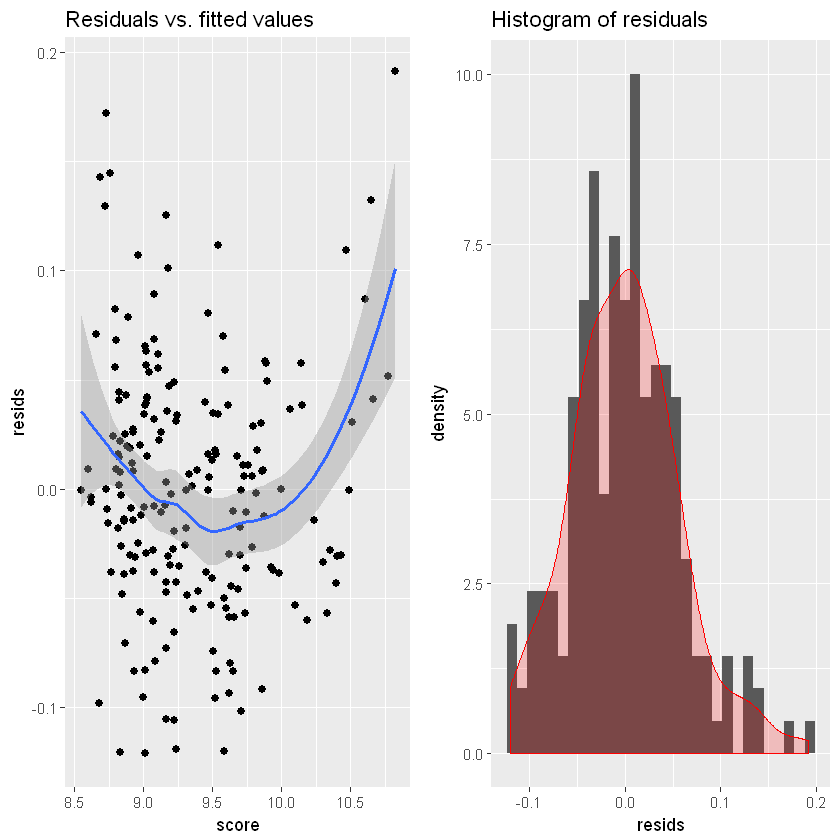

SSE = 49.6267071603926 
SSR = 0.629329945236953 
SST = 50.2560371056296 
RMSE = 0.257133197722241 
Adjusted R^2 = 0.987213894415013 


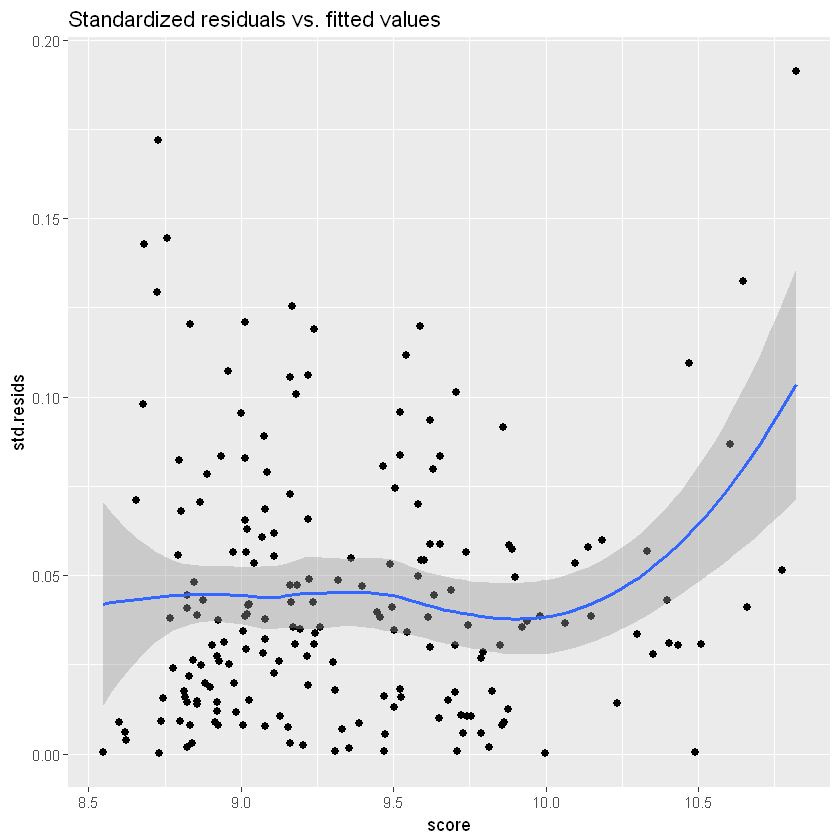

In [64]:
b = as.matrix(auto.price$lnprice)
test.multiple.nlamdas = function(u){
    for(i in u){
        mod.ridge.lasso = glmnet(mm.lnprice, b, family = 'gaussian', nlambda = i, alpha = 0.5)
        plot(mod.ridge.lasso, xvar = 'lambda', label = TRUE)
        plot(mod.ridge.lasso, xvar = 'dev', label = TRUE)

        #create score vector using the predict method on the modal and using the original model matrix
        auto.price$score = predict(mod.ridge.lasso,newx = mm.lnprice)[,i]
        auto.price$resids = auto.price$score - auto.price$lnprice
        
        #plot summary
        plot.svd.reg(auto.price)
    }
    
}
nlamnbdas = c(40,20,15,10)
test.multiple.nlamdas(nlamnbdas)
